In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [7]:
libraries = ["dhl", "numpy", "ngsolve"]
df = pd.DataFrame()
for library in libraries:
    try:
        df = pd.concat([df, pd.read_csv(f"results_{library}.csv")])
    except Exception as e:
        print(e)
        
df.head()

,iterations,labels,time_in_ns,matrix_size,gmacs
0,0,DHL 1 Core,165000,24,0.083782
1,1,DHL 1 Core,7000,24,1.974857
2,2,DHL 1 Core,5000,24,2.764800
3,3,DHL 1 Core,3000,24,4.608000
4,4,DHL 1 Core,2000,24,6.912000


In [9]:
df_grouped = (
    df.groupby(["labels", "matrix_size"])["gmacs"]
    .agg(['mean', 'std', 'count'])
)
df_grouped['ci'] = 1.96 * df_grouped['std'] / np.sqrt(df_grouped['count'])
df_grouped['ci_lower'] = df_grouped['mean'] - df_grouped['ci']
df_grouped['ci_upper'] = df_grouped['mean'] + df_grouped['ci']

df_grouped = df_grouped.reset_index()
df_grouped.head()

,labels,matrix_size,mean,std,count,ci,ci_lower,ci_upper
0,DHL 1 Core,24,3.268688,2.604756,5,2.283169,0.985519,5.551857
1,DHL 1 Core,48,12.876069,3.393078,5,2.974164,9.901904,15.850233
2,DHL 1 Core,72,15.689864,3.691627,5,3.235853,12.454010,18.925717
3,DHL 1 Core,96,18.032557,2.051676,5,1.798373,16.234184,19.830930
4,DHL 1 Core,120,18.489100,1.740417,5,1.525542,16.963557,20.014642


## Matplotlib

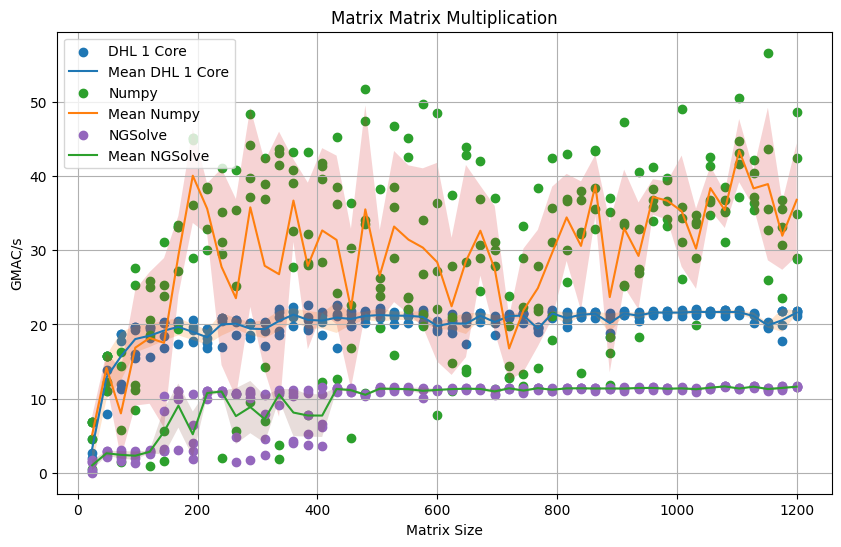

In [4]:
plt.figure(figsize=(10, 6))

for label in df['labels'].unique():
    thread_data = df[df['labels'] == label]
    plt.scatter(thread_data['matrix_size'], thread_data['gmacs'], label=label)
    
    thread_data_grouped = df_grouped[df_grouped["labels"] == label]
    # Add mean line and a single filled confidence interval for each thread
    plt.plot(thread_data_grouped["matrix_size"], thread_data_grouped["mean"], label=f'Mean {label}')
    plt.fill_between(thread_data_grouped["matrix_size"], thread_data_grouped["ci_lower"], thread_data_grouped["ci_upper"], alpha=0.2)

plt.xlabel('Matrix Size')
plt.ylabel('GMAC/s')
plt.title('Matrix Matrix Multiplication')
plt.legend()
plt.grid()
# plt.yscale('log') 
plt.show()

## Plotly

In [5]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

fig = go.Figure()

for label in df['labels'].unique():
    thread_data = df[df['labels'] == label]
    fig.add_trace(go.Scatter(x=thread_data['matrix_size'], y=thread_data['gmacs'], mode='markers', name=label))
    
    thread_data_grouped = df_grouped[df_grouped["labels"] == label]
    # Add mean line and a single filled confidence interval for each thread
    fig.add_trace(go.Scatter(x=thread_data_grouped["matrix_size"], y=thread_data_grouped["mean"], mode='lines', line=dict(dash='dash'), name=f'Mean {label}'))
    fig.add_trace(go.Scatter(x=thread_data_grouped["matrix_size"], y=thread_data_grouped["ci_upper"], mode='lines', line=dict(dash='dash'), showlegend=False, line_color = 'rgba(0,0,0,0)'))
    fig.add_trace(go.Scatter(x=thread_data_grouped["matrix_size"], y=thread_data_grouped["ci_lower"], mode='lines',fill='tonexty', fillcolor='rgba(68, 68, 68, 0.3)', line=dict(dash='dash'), name=f'95% CI {label}', line_color = 'rgba(0,0,0,0)'))
    
fig.update_layout(
    xaxis_title='Matrix Size', 
    yaxis_title='GMAC/s', 
    title='Matrix Matrix Multiplication',)

fig.show()

In [24]:
fig = px.bar(df_grouped, x="matrix_size", y="mean", color="labels", barmode='group')
fig.update_layout(
    xaxis_title='Matrix Size', 
    yaxis_title='GMAC/s', 
    title='Matrix Matrix Multiplication',
)


Help on method update_layout in module plotly.graph_objs._figure:

update_layout(dict1=None, overwrite=False, **kwargs) -> 'Figure' method of plotly.graph_objs._figure.Figure instance
    Update the properties of the figure's layout with a dict and/or with
    keyword arguments.
    
    This recursively updates the structure of the original
    layout with the values in the input dict / keyword arguments.
    
    Parameters
    ----------
    dict1 : dict
        Dictionary of properties to be updated
    overwrite: bool
        If True, overwrite existing properties. If False, apply updates
        to existing properties recursively, preserving existing
        properties that are not specified in the update operation.
    kwargs :
        Keyword/value pair of properties to be updated
    
    Returns
    -------
    BaseFigure
        The Figure object that the update_layout method was called on

